## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="outer", on= "Mouse ID")
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(mouse_study_df)
#1893

mouse_count = mouse_study_df["Mouse ID"].nunique()
mouse_count
#249

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows= mouse_study_df[mouse_study_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_rows.value_counts

<bound method DataFrame.value_counts of     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  >

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates= mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"],keep= False)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df.drop(mouse_study_df[mouse_study_df["Mouse ID"] == "g989"].index, inplace=True)
clean_df= mouse_study_df

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())
#248

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

#create grouby drug regimen
drug_regimen = clean_df.groupby("Drug Regimen")

#create dataframe with mean, median, variance, standard deviation, and SEM of the tumor volume
sum_stats =pd.DataFrame({"Mean Tumor Vol": drug_regimen["Tumor Volume (mm3)"].mean(),
                        "Median Tumor Vol": drug_regimen["Tumor Volume (mm3)"].median(),
                        "Variance Tumor Vol": drug_regimen["Tumor Volume (mm3)"].var(),
                        "Std Dev Tumor Vol": drug_regimen["Tumor Volume (mm3)"].std(),
                        "SEM Tumor Vol": drug_regimen["Tumor Volume (mm3)"].sem(),
                        })

sum_stats

,Mean Tumor Vol,Median Tumor Vol,Variance Tumor Vol,Std Dev Tumor Vol,SEM Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

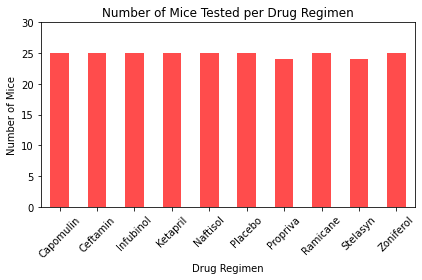

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# create groupby for bar chart
regimen_mouse_count = mouse_study_df.groupby("Drug Regimen").nunique()["Mouse ID"]

# create chart
regimen_mouse_count.plot(kind="bar",color= "red",alpha=0.7)
plt.xticks(rotation=45)

# Set y limit
plt.ylim(0, max(regimen_mouse_count[[1]])+5)


# Set a Title and labels
plt.title("Number of Mice Tested per Drug Regimen")
plt.ylabel("Number of Mice")

# # Save graph 
plt.tight_layout()
plt.savefig("Images/pandas_mouse_count.png")
plt.show()

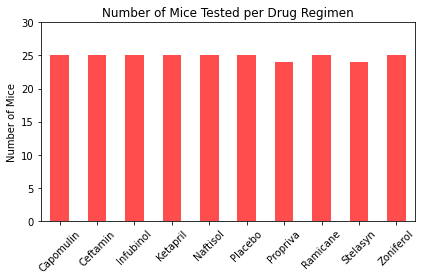

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# create chart
plt.bar(regimen_mouse_count.index.values, regimen_mouse_count.values,
        color="red",alpha=0.7, width=0.5)
plt.xticks(rotation=45)

# Set y limit
plt.ylim(0, max(regimen_mouse_count[[1]])+5)
plt.xlim(-0.5, len(regimen_mouse_count.index.values)-0.5)

# # # Set a Title and labels
plt.title("Number of Mice Tested per Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()

# Save graph 
plt.savefig("Images/plt_mouse_count.png")
plt.show()

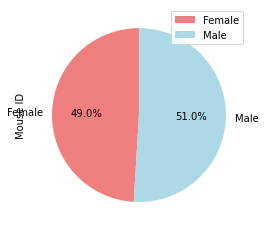

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# create groupby for pie chart
gender = clean_df.groupby("Sex").count()["Mouse ID"]

# create pie chart
gender.plot(kind="pie",colors= ["lightcoral","lightblue"],autopct="%1.1f%%",startangle=90)

#add legend
plt.legend( loc="best")
# Save graph 
plt.savefig("Images/pandas_gender_count.png")
plt.show()

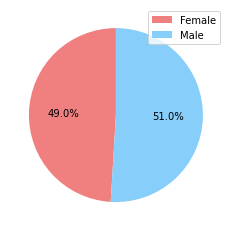

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# create labels and colours
labels= ["Female","Male"]
colors= ["lightcoral","lightskyblue"]

# #create pie chart
plt.pie(gender, colors=colors, autopct="%1.1f%%",startangle=90)
#add legend
plt.legend(labels, loc="best")

# Save graph 
plt.savefig("Images/plt_gender_count.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
end_timepoint = clean_df.groupby(["Mouse ID"])['Timepoint'].max()
end_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
end_tp_df= pd.merge(end_timepoint, clean_df, how="left", on= ["Mouse ID","Timepoint"])
end_tp_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [41]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
top_4 =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol =end_tp_df.loc[end_tp_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    
    # add subset 
    top_4.append(final_tumor_vol)
    
    quartiles=final_tumor_vol.quantile([0.25,0.5,0.75]).round(2)
    lq = round(quartiles[0.25],2)
    uq = round(quartiles[0.75],2)
    iqr= uq-lq
    lower_bound = lq - round((1.5*iqr),2)
    upper_bound = uq + round((1.5*iqr),2)
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol<lower_bound)|(final_tumor_vol>upper_bound)]
    print(f"{drug}'s potential {outliers}")



Capomulin's potential Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential Series([], Name: Tumor Volume (mm3), dtype: float64)


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
